In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

yelp = pd.read_csv('yelp.csv')

/Users/muhammedeltabakh/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
yelp.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0


In [3]:
yelp.shape


(10000, 10)

In [4]:
yelp.stars.value_counts().sort_index()

1     749
2     927
3    1461
4    3526
5    3337
Name: stars, dtype: int64

In [5]:
X = yelp.text
Y = yelp.stars

In [6]:
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size=0.15)

/Users/muhammedeltabakh/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Count Vectorizer and TFIDF are ways of feeding text data into a sparse matrix to perform calculations on them. 

Count Vectorizer counts the occurance of the data, but doesn't give them weights.

TFIDF measures how important each term giving weights to each term relatively to how many times it occures and the size of the document.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vect = CountVectorizer(stop_words=['english', 'place', 'just'], lowercase=True, min_df=7)
#TF = TfidfVectorizer(stop_words=['english', 'place', 'just', 'bianco'], lowercase=True, max_df=3)

The Count Vectorizer works better with this data I'm guessing because there are some classes that doesn't have enough data to distinguish.

I included the word place, just in the stop words and the accuracy and precision went up a little, specially for class1

In [8]:
x_train_dtm = vect.fit_transform(X_train)
print(x_train_dtm)

  (0, 2676)	1
  (0, 1826)	1
  (0, 891)	1
  (0, 3998)	1
  (0, 0)	1
  (0, 423)	1
  (0, 3977)	1
  (0, 3885)	1
  (0, 4607)	1
  (0, 5648)	1
  (0, 4432)	1
  (0, 1473)	1
  (0, 3898)	1
  (0, 6019)	1
  (0, 5056)	1
  (0, 6421)	1
  (0, 625)	1
  (0, 3765)	1
  (0, 1404)	1
  (0, 3613)	1
  (0, 2355)	1
  (0, 3944)	1
  (0, 2163)	1
  (0, 5834)	1
  (0, 4377)	1
  :	:
  (8499, 3367)	1
  (8499, 3943)	1
  (8499, 6144)	1
  (8499, 907)	1
  (8499, 2930)	1
  (8499, 2713)	3
  (8499, 1458)	1
  (8499, 2344)	2
  (8499, 891)	1
  (8499, 3424)	1
  (8499, 5842)	1
  (8499, 2103)	1
  (8499, 6163)	1
  (8499, 573)	1
  (8499, 2733)	1
  (8499, 5829)	1
  (8499, 2503)	1
  (8499, 4772)	1
  (8499, 5810)	3
  (8499, 234)	2
  (8499, 283)	3
  (8499, 5894)	1
  (8499, 5817)	1
  (8499, 5812)	1
  (8499, 3964)	1


In [9]:
x_test_dtm = vect.transform(X_test)
x_test_dtm.shape

(1500, 6515)

In [10]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [11]:
nb.fit(x_train_dtm, Y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:
y_pred_class = nb.predict(x_test_dtm)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(Y_test, y_pred_class)
print (accuracy)

0.524


In [14]:
Y_test.value_counts()

5    523
4    519
3    211
2    136
1    111
Name: stars, dtype: int64

In [15]:
matrix_accuracy = confusion_matrix(Y_test, y_pred_class)
print matrix_accuracy

[[ 67  27   9   5   3]
 [ 18  39  49  21   9]
 [ 14  25  81  71  20]
 [  7  11  75 286 140]
 [ 18  10  17 165 313]]


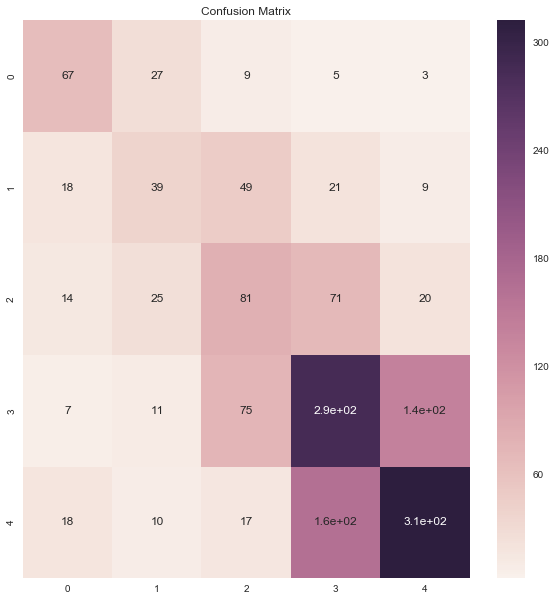

In [16]:
import seaborn as sns
plt.figure(figsize=(10,10))
plt.title("Confusion Matrix")

sns.heatmap(matrix_accuracy, annot=True)

The model is finding it hard to classify between between 4 and 5 stars.
1-2-3star reviews are commonly classified as because it is the dominant class I guess. 

In [17]:
from sklearn import metrics
print metrics.classification_report(Y_test, y_pred_class)

             precision    recall  f1-score   support

          1       0.54      0.60      0.57       111
          2       0.35      0.29      0.31       136
          3       0.35      0.38      0.37       211
          4       0.52      0.55      0.54       519
          5       0.65      0.60      0.62       523

avg / total       0.53      0.52      0.52      1500



I was getting low recall for class 1 , meaning that the model had a hard time detecting the 1-star reviews, but high precision, meaning that when the model predicts a review is 1-star, it's usually correct. 

After removing the words above with the stop words the precision and recall improved also 2 and 3 star reviews also improved slightly 

After changing the min_df parameter to 7 the model performed better and I got better results for class 1 precision and recall.

class 4 has high recall, meaning the model isn't finding it hard to detect 4 star reviews probably because it has the most count.

Class 5 has high recall and precision, probably because 5-star reviews have polarized language, and because the model has a lot of observations to learn from.

In [18]:
X_test[Y_test < y_pred_class].head(5)

9394    Not quite hot sex on a platter but good food, ...
5906    Nice resort located in downtown Chandler. The ...
2343    La Bocca was on my radar since it opened earli...
1819    Simply put, this place rocks. CleanFreak has a...
6718    I didn't have an outstanding experience in thi...
Name: text, dtype: object

In [19]:
X_test[Y_test > y_pred_class].head(5)

898     When Hoa called and said we were having a reun...
1087    Delicious barbecue, we had 4 meats platter tha...
2308    After stopping by Gallo Blanco for breakfast o...
3728    I enjoyed my nights here.  The facilities are ...
4795    I always find it reassuring when I pull up to ...
Name: text, dtype: object

# Exploring the features of the data

In [20]:
x_train_tokens  = vect.get_feature_names()
len(x_train_tokens)

6515

In [21]:
nb.feature_count_.shape

(5, 6515)

I'm just gonna create a data frame for the features and the label to get a good look at the data to see what is affecting my model

In [22]:
one_star_count = nb.feature_count_[0,:]
two_star_count = nb.feature_count_[1,:]
three_star_count = nb.feature_count_[2,:]
four_star_count = nb.feature_count_[3,:]
five_star_count = nb.feature_count_[4,:]

In [23]:
tokens = pd.DataFrame({'token': x_train_tokens, 'one_star':one_star_count, 'two_star': two_star_count,'three_star': three_star_count, 'four_star': four_star_count, 'five_star': five_star_count}).set_index('token')

In [24]:
tokens.head(5)

,five_star,four_star,one_star,three_star,two_star
token,,,,,
00,44.0,63.0,36.0,32.0,38.0
000,10.0,5.0,5.0,1.0,2.0
00pm,6.0,2.0,1.0,0.0,0.0
07,5.0,3.0,3.0,2.0,0.0
10,155.0,218.0,82.0,94.0,91.0


In [25]:
nb.class_count_

array([  638.,   791.,  1250.,  3007.,  2814.])

In [26]:
tokens['one_star'] = tokens.one_star + 1
tokens['two_star'] = tokens.two_star + 1
tokens['three_stars'] = tokens.three_star + 1 
tokens['four_star'] = tokens.four_star + 1
tokens['five_star'] = tokens.five_star + 1

In [27]:
tokens.sort_values('two_star',ascending=False).head(10)


,five_star,four_star,one_star,three_star,two_star,three_stars
token,,,,,,
the,16066.0,20463.0,4824.0,9318.0,6376.0,9319.0
and,11886.0,13638.0,3010.0,5412.0,3604.0,5413.0
to,7409.0,8755.0,2673.0,4117.0,3024.0,4118.0
was,3940.0,5896.0,1655.0,3166.0,2272.0,3167.0
it,4823.0,6258.0,1480.0,3195.0,1957.0,3196.0
of,5248.0,6559.0,1456.0,2831.0,1868.0,2832.0
for,3760.0,4630.0,1099.0,2256.0,1423.0,2257.0
that,2978.0,3629.0,1060.0,1815.0,1371.0,1816.0
in,3996.0,4378.0,1070.0,2026.0,1345.0,2027.0


In [28]:
tokens['five_star_ratio'] = tokens.five_star / tokens.one_star 

In [29]:
tokens.sort_values('five_star_ratio', ascending=False).head(5)

,five_star,four_star,one_star,three_star,two_star,three_stars,five_star_ratio
token,,,,,,,
fantastic,216.0,148.0,2.0,34.0,8.0,35.0,108.000000
yum,66.0,92.0,1.0,21.0,6.0,22.0,66.000000
perfect,262.0,225.0,4.0,42.0,7.0,43.0,65.500000
favorite,373.0,282.0,7.0,69.0,27.0,70.0,53.285714
reasonably,46.0,48.0,1.0,14.0,8.0,15.0,46.000000


# Classifying 1 and 5 stars

The model should work fine if we try to classify 1 and 5 star reviews. so let's try it

In [30]:
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]


In [31]:
X1 = yelp_best_worst.text
Y1 = yelp_best_worst.stars

In [32]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, random_state=0, test_size=.3)


In [33]:
vect1 = CountVectorizer(stop_words=['english', 'place', 'just'], lowercase=True, min_df=3)


In [34]:
x_dtm = vect1.fit_transform(X_train1)

In [35]:
x1_dtm = vect1.transform(X_test1)

In [36]:
nb.fit(x_dtm, y_train1)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
y_pred = nb.predict(x1_dtm)

In [38]:
accuracy_score(y_test1, y_pred)

0.9290375203915171

In [39]:
confusion_matrix(y_test1, y_pred)

array([[182,  49],
       [ 38, 957]])

In [40]:
print metrics.classification_report(y_test1, y_pred)

             precision    recall  f1-score   support

          1       0.83      0.79      0.81       231
          5       0.95      0.96      0.96       995

avg / total       0.93      0.93      0.93      1226



It's much easier to classify 1 and 5 stars in every aspect